<a href="https://colab.research.google.com/github/Gan4x4/CV-HSE2019/blob/master/Dataset_and_Dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting content/cifar-10-python.tar.gz to content
torch.Size([8, 3, 32, 32]) tensor([6, 9, 9, 4, 1, 1, 2, 7])



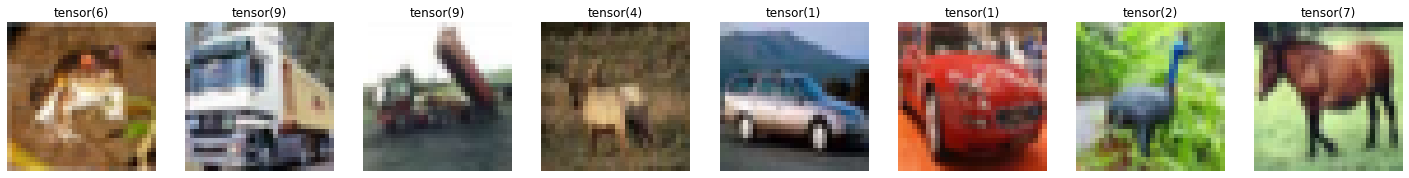

In [3]:
# Dataset & Dataloader

import matplotlib.pyplot as plt
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader

#Helper function to display images stored in pytorch tesnsor format
plt.rcParams["figure.figsize"] = (25,10)

def tensor_show(tensor_image,class_num,i):
  plt.subplot(1, data_loader.batch_size ,i+1)
  plt.imshow(tensor_image.numpy().transpose((1, 2, 0)))
  plt.axis('off')
  plt.title(str(class_num))

# Download a CIFAR10 dataset
transform=transforms.Compose([transforms.ToTensor()])
dataset = datasets.CIFAR10("content", train=True, transform = transform, download=True)

data_loader = DataLoader(dataset, batch_size=8)

for images, class_nums in data_loader:
  # class_nums are tensor!
  print (images.shape,class_nums)
  for i, image in enumerate(images):
    tensor_show(image,class_nums[i],i)
  break # stop after first batch


In [2]:
import os

# Download dataset
!wget -O bt_dataset.zip https://github.com/Gan4x4/CV-HSE2019/blob/master/data/bt_dataset.zip?raw=true
!unzip -q bt_dataset.zip -d "/content/biketypes"
!ls -l /content/biketypes/
!ls -l /content/biketypes/train
!ls -l /content/biketypes/train/city

--2020-04-09 08:38:59--  https://github.com/Gan4x4/CV-HSE2019/blob/master/data/bt_dataset.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Gan4x4/CV-HSE2019/raw/master/data/bt_dataset.zip [following]
--2020-04-09 08:38:59--  https://github.com/Gan4x4/CV-HSE2019/raw/master/data/bt_dataset.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Gan4x4/CV-HSE2019/master/data/bt_dataset.zip [following]
--2020-04-09 08:38:59--  https://raw.githubusercontent.com/Gan4x4/CV-HSE2019/master/data/bt_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awa

['city', 'mtb']
torch.Size([8, 3, 224, 224]) tensor([1, 1, 1, 1, 1, 1, 1, 1])


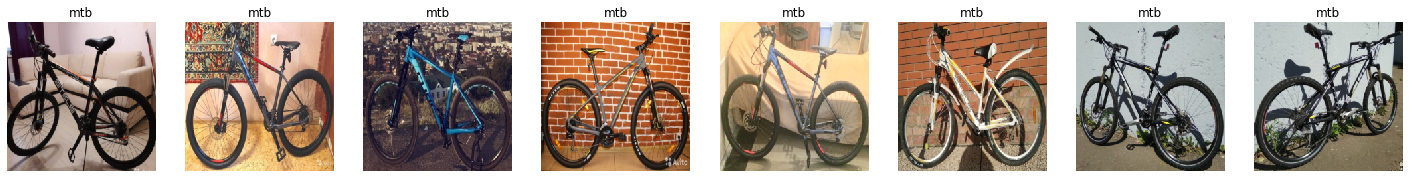

In [0]:
# Load user dataset with 

from torchvision.datasets import ImageFolder
plt.rcParams["figure.figsize"] = (25,10)

transform=transforms.Compose([transforms.Resize((224,224)),
                              transforms.ToTensor()])

val_dataset = ImageFolder("/content/biketypes/val", transform = transform)
train_dataset = ImageFolder("/content/biketypes/train", transform = transform)

print(val_dataset.classes)

data_loader = DataLoader(val_dataset,  batch_size=8, shuffle = True)
i = 1
for images, class_nums in data_loader:
  print (images.shape,class_nums)
  for i, image in enumerate(images):
    tensor_show(image,val_dataset.classes[class_nums[i]],i)
    # output = model(images)
  break

--2020-04-09 08:41:51--  https://raw.githubusercontent.com/Gan4x4/CV-HSE2019/master/data/2bikes.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205402 (201K) [image/jpeg]
Saving to: ‘/content/bike.jpg’

/content/bike.jpg   100%[===================>] 200.59K  --.-KB/s    in 0.04s   

2020-04-09 08:41:51 (4.75 MB/s) - ‘/content/bike.jpg’ saved [205402/205402]



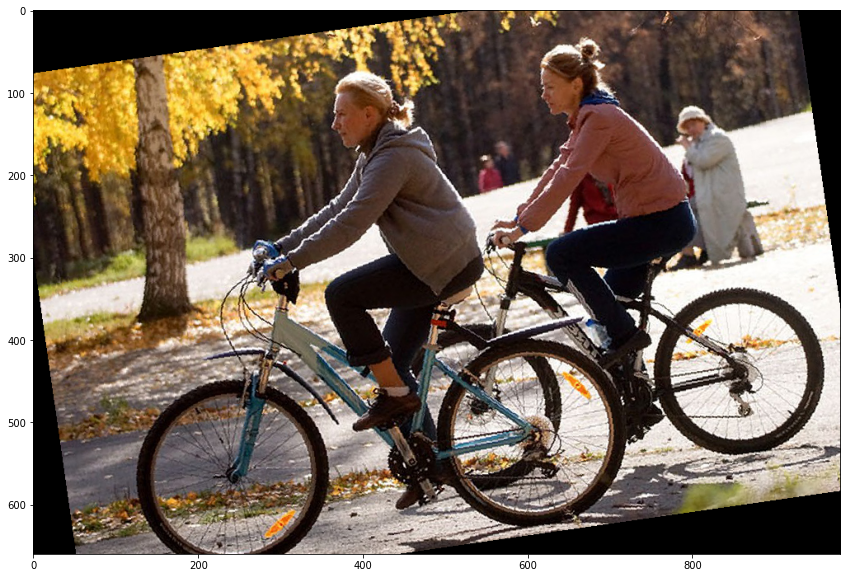

In [4]:
#Augmentation

# Download sample image

! wget -O "/content/bike.jpg" https://raw.githubusercontent.com/Gan4x4/CV-HSE2019/master/data/2bikes.jpeg
from PIL import Image

# Open image in Pillow format and show 
pil_image = Image.open("/content/bike.jpg")
transform=transforms.Compose([
                              transforms.Pad(10),
                              transforms.RandomRotation(15),
                              transforms.RandomHorizontalFlip(p=0.5)
                              #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                              ])
image = transform(pil_image)
plt.imshow(image)


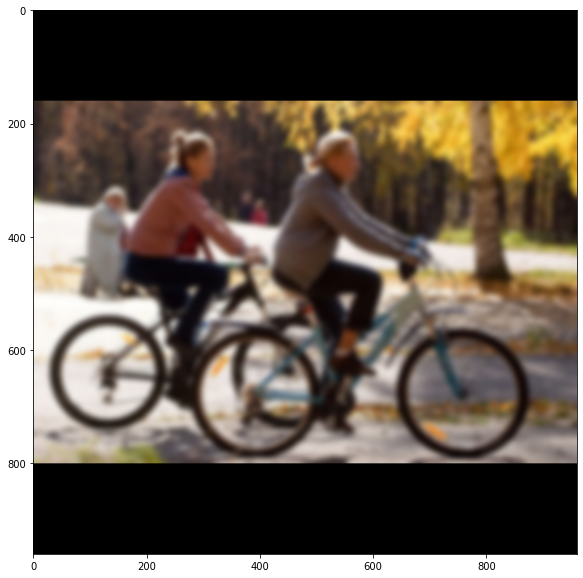

In [5]:
# Define custom transform
from PIL import ImageFilter

def blur(pil_image,radius):
  return pil_image.filter(ImageFilter.GaussianBlur(radius=radius))

class PadToSquare:
  def __call__(self, img):
    diff = pil_image.size[0] - pil_image.size[1]
    if diff == 0:
      return pil_image
    padding = (0,int(diff/2)) if diff >0 else (int(diff/2),0)
    return transforms.functional.pad(img,padding)

pil_image = Image.open("/content/bike.jpg")
transform=transforms.Compose([
                              transforms.Lambda(lambda x: blur(x,5)),
                              PadToSquare(),
                              ])
image = transform(pil_image)
plt.imshow(image)


